In [3]:
# Copyright (c) OpenMMLab. All rights reserved.
import os
import os.path as osp
import warnings
from argparse import ArgumentParser

import mmcv

from mmpose.apis import (init_pose_model,vis_pose_result)
from mmpose.apis.inference import inference_top_down_pose_model_batch
from mmpose.datasets import DatasetInfo
import cv2
import numpy as np

POSE_CONFIG="/Users/derek/Desktop/ViTPose/ViTPose_base_coco_256x192.py"
POSE_CHECKPOINT="/Users/derek/Desktop/ViTPose/vitpose_base_coco_aic_mpii.pth"
IMG_PATH="/Users/derek/Desktop/Detection/detection/output_frame_001.png"


pose_model = init_pose_model(POSE_CONFIG, POSE_CHECKPOINT, device="cpu")
dataset = pose_model.cfg.data['test']['type']
dataset_info = pose_model.cfg.data['test'].get('dataset_info', None)
dataset_info = DatasetInfo(dataset_info)
return_heatmap = False
output_layer_names = None

image = cv2.imread(IMG_PATH)
image = np.array(image).transpose(2, 0, 1)
h = image.shape[1]
w = image.shape[2]
image = image.reshape(1, 3, h, w)
# repeat the image for batch inference
images = np.repeat(image, 2, axis=0)

apex is not installed
apex is not installed
apex is not installed


/Users/derek/Desktop/ViTPose/.venv/lib/python3.10/site-packages/mmcv/cnn/bricks/transformer.py:33: UserWarning: Fail to import ``MultiScaleDeformableAttention`` from ``mmcv.ops.multi_scale_deform_attn``, You should install ``mmcv-full`` if you need this module. 
  warnings.warn('Fail to import ``MultiScaleDeformableAttention`` from '
/Users/derek/Desktop/ViTPose/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


load checkpoint from local path: /Users/derek/Desktop/ViTPose/vitpose_base_coco_aic_mpii.pth
The model and loaded state dict do not match exactly

unexpected key in source state_dict: associate_keypoint_heads.0.deconv_layers.0.weight, associate_keypoint_heads.0.deconv_layers.1.weight, associate_keypoint_heads.0.deconv_layers.1.bias, associate_keypoint_heads.0.deconv_layers.1.running_mean, associate_keypoint_heads.0.deconv_layers.1.running_var, associate_keypoint_heads.0.deconv_layers.1.num_batches_tracked, associate_keypoint_heads.0.deconv_layers.3.weight, associate_keypoint_heads.0.deconv_layers.4.weight, associate_keypoint_heads.0.deconv_layers.4.bias, associate_keypoint_heads.0.deconv_layers.4.running_mean, associate_keypoint_heads.0.deconv_layers.4.running_var, associate_keypoint_heads.0.deconv_layers.4.num_batches_tracked, associate_keypoint_heads.0.final_layer.weight, associate_keypoint_heads.0.final_layer.bias, associate_keypoint_heads.1.deconv_layers.0.weight, associate_keypoin

In [9]:
pose_results, returned_outputs = inference_top_down_pose_model_batch(
    pose_model,
    [IMG_PATH, IMG_PATH],
    person_results=None,
    bbox_thr=None,
    format='xywh',
    dataset=dataset,
    dataset_info=dataset_info,
    return_heatmap=return_heatmap,
    outputs=output_layer_names)

In [47]:
pose_results[0]['keypoints'].tolist()

[[71.75961303710938, 24.465492248535156, 0.7246747016906738],
 [71.42337036132812, 22.177345275878906, 0.8408094048500061],
 [76.6943359375, 22.78894805908203, 0.6986919641494751],
 [70.10107421875, 24.43048858642578, 0.9820191264152527],
 [83.69830322265625, 26.145179748535156, 0.9305262565612793],
 [61.1300048828125, 39.37268829345703, 0.9634907245635986],
 [90.09078979492188, 41.417335510253906, 0.9461135864257812],
 [53.914581298828125, 61.840599060058594, 0.966543436050415],
 [91.10211181640625, 66.04691314697266, 0.933724045753479],
 [65.00283813476562, 58.655799865722656, 0.7666001319885254],
 [77.85752868652344, 61.52765655517578, 0.6467602252960205],
 [63.274505615234375, 82.1601333618164, 0.8836421966552734],
 [82.20364379882812, 83.29102325439453, 0.8901031017303467],
 [45.110137939453125, 106.80240631103516, 0.956912100315094],
 [89.11265563964844, 111.9251480102539, 0.9472373723983765],
 [35.480224609375, 143.43460083007812, 0.9086849689483643],
 [94.51580810546875, 144.92

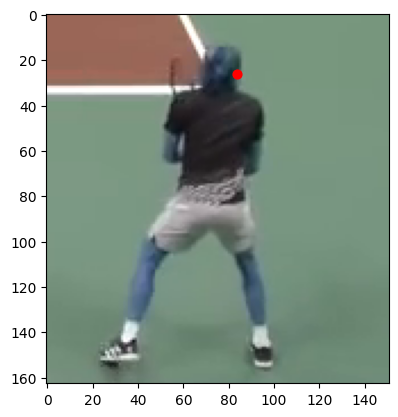

In [43]:
import cv2
import matplotlib.pyplot as plt
x, y, z = pose_results[0]['keypoints'][4]
image = cv2.imread(IMG_PATH)

# plot a point
plt.imshow(image)
plt.scatter(x, y, c='r', s=40)

In [27]:
vis_pose_result(
    pose_model,
    IMG_PATH,
    [pose_results[0]],
    dataset=dataset,
    dataset_info=dataset_info,
    kpt_score_thr=0.3,
    radius=4,
    thickness=1,
    show=False,
    out_file="output")

error: OpenCV(4.10.0) /Users/xperience/GHA-Actions-OpenCV/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp:1141: error: (-2:Unspecified error) could not find encoder for the specified extension in function 'imencode'
